<a href="https://colab.research.google.com/github/LM1997610/Fundamentals_DS/blob/main/FDS_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentals of Data Science - Winter Semester 2022**


#### Prof. Fabio Galasso, Leonardo Plini (TA), Luca Scofano (TA), Paolo Mandica (TA)
<galasso@di.uniroma1.it>, <plini.2000543@studenti.uniroma1.it> , <scofano@di.uniroma1.it>, <mandica@di.uniroma1.it>

## **#2 Homework: Classification**

Group members in alphabetical order:

- Sara Cammarota, 1869943, cammarota.1869943@studenti.uniroma1.it
- Gianmarco Fiorenza, 2086296, fiorenza.2086296@studenti.uniroma1.it
- Mattia Girolami, 2076424, girolami.2076424@studenti.uniroma1.it
- Luca Mazzucco, 1997610, mazzucco.1997610@studenti.uniroma1.it
- Ilaria Petrucci, 1732987, petrucci.1732987@studenti.uniroma1.it




-----------------------------------

*Note: your task is to fill in the missing code where you see `"YOUR CODE HERE"` and the text part `"WRITE YOUR TEXT HERE"` part corresponding to each subproblem and produce brief reports on the results whenever necessary.*

As part of the homework, provide the answer to questions in this notebook report-like manner.

After you have implemented all the missing code in the required sections, you will be able to run all the code without any errors.

We kindly ask you to double-check this since **all** the delivered homework will be executed.

The completed exercise should be handed in as a single notebook file. Use Markdown to provide equations. Use the code sections to provide your scripts and the corresponding plots.

-------------------------------------

**Submit it** by sending an email to:

**galasso@di.uniroma1.it**,\
**mandica@di.uniroma1.it**,\
**scofano@di.uniroma1.it**,\
**plini.2000543@studenti.uniroma1.it**

**by Monday, November 17th, 23:59**.

-------------------------------------

**Outline and Scores for #2 Homework:**


* **Question 1: Logistic Resgression and Gradient Ascent** *(10 points)*
  * **Question 1.1: Log-likelihood and Gradient ascend rule**
  * **Question 1.2: Implementation of logistic regression with Gradient Ascent**
  * **Question 1.3: Report**

* **Question 2: Logistic Regression with non linear boundaries** *(7 points)*
  * **Question 2.1: Polynomial features for logistic regression**
  * **Question 2.2: Plot the computed non-linear boundary**
  * **Question 2.3: Report**

* **Question 3: Multinomial Classification** *(13 points)*
  * **Question 3.1: Softmax Regression Model**
  * **Question 3.2: Coding**
  * **Question 3.3: Meseaure of Godness**
  * **Question 3.4: Report**

* **BONUS Question 4: Transfer Learning on CIFAR-10** *(5 points)*
  * **Question 4.1: Train a KNN Classifier on CIFAR-10**
  * **Question 4.2: Train a Softmax Classifier on CIFAR-10**
  * **Question 4.3: Report**
  

**TOTAL POINTS ARE 35, BONUS QUESTION INCLUDED**

**Notation:**

- $x^i$ is the $i^{th}$ feature vector
- $y^i$ is the expected outcome for the $i^{th}$ training example
- $m$ is the number of training examples
- $n$ is the number of features

**Let's start by setting up our Python environment and importing the required libraries:**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp

%matplotlib inline
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt # sets up plotting under plt

from sklearn.datasets import make_classification
import seaborn as sns
from tqdm import tqdm

# sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns # sets up styles and gives us more plotting options

## **Question 1: Logistic Regression with Gradient Ascent *(10 Points)***

### **Question 1.1: Log-likelihood and Gradient ascend Rule *(3/10 Points)***

Write the likelihood $L(\theta)$ and log-likelihood $l(\theta)$ of the parameters $\theta$.

Recall the probabilistic interpretation of the hypothesis $h_\theta(x)= P(y=1|x;\theta)$ and that $h_\theta(x)=\frac{1}{1+\exp(-\theta^T x)}$.

Also derive the gradient $\frac{\delta l(\theta)}{\delta \theta_j}$ of $l(\theta)$ and write the gradient update equation.

-------------------------------------------------------
Recalling the probabilistic interpretation of the hypothesis we have that $h_\theta(x)= P(y=1|x;\theta)$ and from that we obtain that $P(y=0|x;\theta)=1-h_\theta(x)$. Therefore

\begin{align*}
P(y|x;\theta)=h_\theta(x)^y \cdot (1-h_\theta(x))^{1-y}
\end{align*}
So we derive that the $likelihood$ is:
\begin{align*}
L(\theta)=\prod_{i=1}^m h_{\theta}(x^{(i)})^{y^{(i)}}(1-h_{\theta}(x^{(i)}))^{1-y^{(i)}}
\end{align*}

By applying logarithms to the likelihood, thanks to the properties of the logaritms we can write the $\log$-$likelihood$ as follows:
\begin{align*}
l(\theta)=\log(L(\theta))=\sum_{i=1}^m y^{(i)}log(h_{\theta}(x^{(i)})+(1-y^{(i)})log(1-h_{\theta}x^{(i)})
\end{align*}
Then we derive that the partial derivative of $l(\theta)$ respect to $\theta_j$ is:
\begin{align*}
\frac{\partial }{\partial \theta_j}l(\theta)=\sum_{i=1}^m(y^{(i)}-h_{\theta}(x^{(i)}))x_{j}^{(i)}
\end{align*}
and we can write the gradient update equation which is:
\begin{align*}
\theta_j := \theta_j+\alpha \cdot \sum_{i=1}^m(y^{(i)}-h_{\theta}(x^{(i)}))x_{j}^{(i)}
\end{align*}

-------------------------------------------------------

### **Question 1.2: Implementation of logistic regression with Gradient Ascent *(5/10 Points)***

Translate the equations you wrote above in code to learn the logistic regression parameters.

The dataset used here is created using *make_classification* function present in the *sklearn* library.

$x^{(i)}_1$ and $x^{(i)}_2$ represent the two features for the $i$-th data sample $x^{(i)}$ and $y^{(i)}$ is its ground truth label.




**Do not write below this line just run it**

--------------------------------------------

In [2]:
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=5)
X.shape, y.shape

((500, 2), (500,))

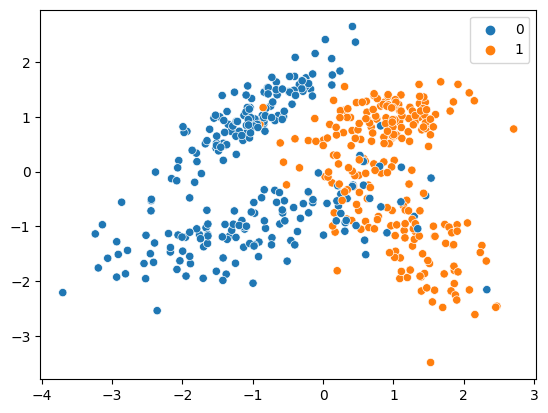

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

Adding a column of 1's to $X$ to take into account the zero intercept

In [4]:
x = np.hstack([np.ones((X.shape[0], 1)), X])

In [5]:
[x[:5,:],x[-5:,:]] # Plot the first and last 5 lines of x, now containing features x0 (constant=1), x1 and x2

[array([[ 1.        ,  2.25698215, -1.34710915],
        [ 1.        ,  1.43699308,  1.28420453],
        [ 1.        ,  0.57927295,  0.23690172],
        [ 1.        ,  0.42538132, -0.24611145],
        [ 1.        ,  1.13485101, -0.61162683]]),
 array([[ 1.        ,  1.56638944,  0.81749944],
        [ 1.        , -1.94913831, -1.90601147],
        [ 1.        ,  1.53440506, -0.11687238],
        [ 1.        , -0.39243599,  1.39209018],
        [ 1.        , -0.11881249,  0.96973739]])]

In [6]:
[y[:5],y[-5:]] # Plot the first and last 5 lines of y

[array([1, 1, 1, 0, 1]), array([1, 0, 0, 0, 1])]

Define the sigmoid function **sigmoid**, the function to compute the gradient of the log likelihood  **grad_l** and the gradient ascent algorithm.


**Write your code below this line**

--------------------------------------------

In [7]:
def sigmoid(x):
    '''
    Function to compute the sigmoid of a given input x.

    Input:
    x: it's the input data matrix. The shape is (N, H)

    Output:
    g: The sigmoid of the input x
    '''

    g=1/(1 + np.exp(-x))
    return g

def log_likelihood(theta,features,target):
    '''
    Function to compute the log likehood of theta according to data x and label y

    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)
    target: the label array

    Output:
    log_g: the log likehood of theta according to data x and label y
    '''

    m = y.shape[0]
    h_theta = sigmoid (features.dot(theta))
    log_l = np.sum((target* np.log( h_theta) , (1 - target) * np.log(1 -  h_theta))) / m

    return log_l


def predictions(features, theta):
    '''
    Function to compute the predictions for the input features

    Input:
    theta: it's the model parameter matrix.
    features: it's the input data matrix. The shape is (N, H)

    Output:
    preds: the predictions of the input features
    '''

    preds = sigmoid (np.dot(features, theta))

    return preds


def update_theta(theta, target, preds, features, lr):
    '''
    Function to compute the gradient of the log likelihood
    and then return the updated weights

    Input:
    theta: the model parameter matrix.
    target: the label array
    preds: the predictions of the input features
    features: it's the input data matrix. The shape is (N, H)
    lr: the learning rate

    Output:
    theta: the updated model parameter matrix.
    '''

    m = target.shape[0]
    gradient = (1/m)* np.dot(features.T, (preds-target))
    theta = theta - lr*gradient
    return theta

def gradient_ascent(theta, features, target, lr, num_steps):
    '''
    Function to execute the gradient ascent algorithm

    Input:
    theta: the model parameter matrix.
    target: the label array
    num_steps: the number of iterations
    features: the input data matrix. The shape is (N, H)
    lr: the learning rate

    Output:
    theta: the final model parameter matrix.
    log_likelihood_history: the values of the log likelihood during the process
    '''

    log_likelihood_history = np.zeros(num_steps)

    for step in range(num_steps):
        preds = predictions(features, theta)
        log = log_likelihood(np.array(theta),features,target)
        theta = update_theta(np.array(theta), target, preds, features, lr)
        log_likelihood_history[step] = log

    return theta, log_likelihood_history



**Do not write below this line just run it**

--------------------------------------------

**Check your grad_l implementation:**

grad_l applied to the theta_test (defined below) should provide a value for log_l_test close to the target_value (defined below) *(in other words the error_test should be 0, up to machine error precision.)*

In [8]:
target_value = -1.630501731599431

output_test  = log_likelihood(np.array([-7,4,1]),x,y)
error_test=np.abs(output_test-target_value)

print("{:f}".format(error_test))

0.000000


Let's apply the function gradient_ascent and print the final theta as well as theta_history:

In [9]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
n_iter=1000
theta_final, log_l_history = gradient_ascent(theta0,x,y,lr=0.5,num_steps=n_iter)
print(theta_final)

[-0.46097042  2.90036399  0.23146846]


Let's plot the log likelihood over different iterations:


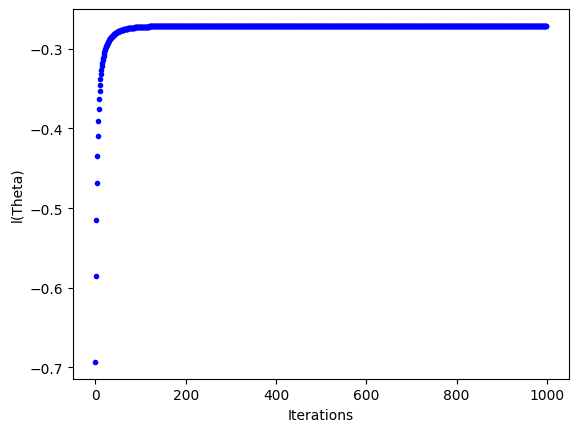

In [10]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)),log_l_history,'b.')

Plot the data and the decision boundary:

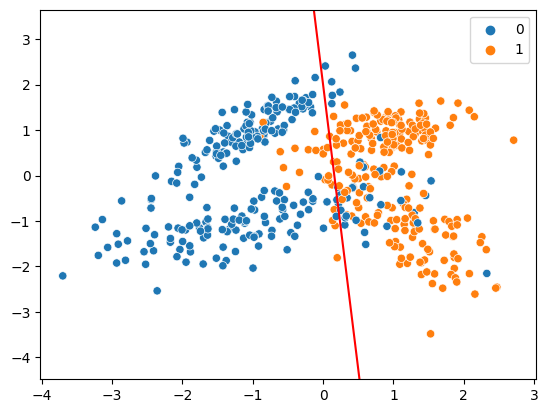

In [11]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(X[:,0].min(),X[:,1].max(),2)

# Plot raw data
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X)

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red")
plt.ylim(X[:,1].min()-1,X[:,1].max()+1)
# Save the theta_final value for later comparisons
theta_GA = theta_final.copy()

### **Question 1.3: Report *(2/10 Points)***

1. Are we looking for a local minimum or a local maximum using the gradient ascent rule?
2. You have implemented the gradient ascent rule. Could we have also used gradient descent instead for the proposed problem? Why/Why not?
3. Let's deeply analyze how the learning rate $\alpha$ and the number of iterations affect the final results. Run the algorithm you have written for different values of $\alpha$ and the number of iterations and look at the outputs you get. Is the decision boundary influenced by these parameters change? Why do you think these parameters are affecting/not affecting the results?

-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**
1. Using the gradient ascent rule we are searching for a local maximum.
2. Gradient descent and ascent are actually interchangeable: while gradient descent indicates an iterative movement towards the closest minimum, gradient ascent, conversely, indicates a movement towards the nearest maximum. In this sense, for any function f on which we apply gradient descent, there is a symmetric function -f on which we can apply gradient ascent, so depending on our purpose to maximize or minimize and our function, which could be concave or convex, we should set the appropriate sign in the theta updating. In a scenario in which we work with likelihood, we can implement gradient ascent to maximize the likelihood function; on the other hand, if we are working with a cost function we can implement gradient descent to minimize the cost function.

3.


| Learning Rate | Number of Steps | Convergence | Decision Boundary
| :-: | :-: | :-: | :-: |
| 50 | 50 | No, oscillating | Different
| 25 | 50 | No, oscillating| Different
| 10 | 50 | Yes | Unchanged
| 5 | 1000 | Yes | Unchanged
| 1 | 1000 | Yes | Unchanged
| 1 | 100 | Yes | Unchanged
| 0.5 | 1000 | Yes | original choice of parameters --> original DB
| 0.05 | 1000 | Yes | Unchanged
| 0.005 | 1000 | No | Less precise
| 0.005 | 10000 | No | Less precise
| 0.005 | 100000 | Yes | Unchanged
| 0.0005 | 1000 | No | Less precise
| 0.0005 | 10000 | No | Less precise
| 0.0005 | 100000 | No | Less precise
| 0.0005 | 1000000 | Yes | Unchanged

In general if there is convergence, the decision boundary is unchanged. For very high values of learning rate the log likelihood starts to oscillate. For example, if $lr = 50$ the likelihood will assume values between -2.50 and -0.250. However the decision boundary in the explored cases does not look drastically different from the one computed with a lower learning rate, although an angle different than zero between the two decision boundaries exists.
A possible explanation of this phenomenon is that even with no convergence, the likelihood, oscillating, will still spend the majority of the time in a section of high likelihood (i.e. the likelihood graph looks dense in correspondence of high likelihoods and sparse in correspondence of very low likelihoods).

The cell below shows the behaviour of $\theta$ for $ lr = 25 $ and $ lr = 50$ and $n_{steps} = 10000$.
In the case of $lr = 25$, the likelihood will eventually oscillate around a value slightly higher than $-0.4$.
In the case of $lr = 50$ even if there is no convergence, choosing to stop the process at a random point $n_{steps}$ will more likely produce a set of parameters with high likelihood and as a consequence a decision boundary that doesn't look completely different that the one computed with convergence. If we purposely choose a $n_{steps}$ that corresponds to a point of low likelihood, on the other hand, the decision boundary will be completely different.
Despite this considerations we must always choose a situation in which we have convergence and choose the appropriate learning rate.



-------------------------------------------------------

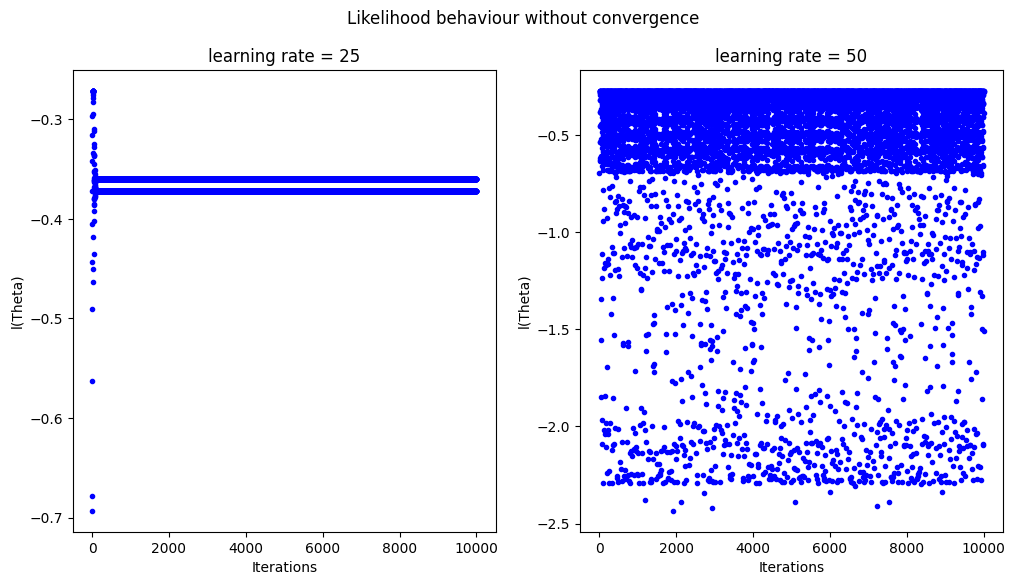

In [12]:
import warnings
warnings.filterwarnings("ignore")

# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Gradient Ascent method
theta_final, log_l_history_25 = gradient_ascent(theta0,x,y,lr=25,num_steps=10000)
theta_final, log_l_history_50 = gradient_ascent(theta0,x,y,lr=50,num_steps=10000)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
fig.suptitle('Likelihood behaviour without convergence')
ax1.plot(range(len(log_l_history_25)),log_l_history_25,'b.')
ax2.plot(range(len(log_l_history_50)),log_l_history_50,'b.')

ax1.set_title('learning rate = 25')
ax2.set_title('learning rate = 50')

ax1.set_ylabel('l(Theta)')
ax2.set_ylabel('l(Theta)')
ax1.set_xlabel('Iterations')
ax2.set_xlabel('Iterations')
plt.show()

## **Question 2: Logistic Regression with non linear boundaries *(7 points)***

### **Question 2.1: Polynomial features for logistic regression *(4/7 Points)***

Define new features, e.g. of 2nd and 3rd degrees, and learn a logistic regression classifier by using the new features, ans the gradient ascent optimization algorithm defined in Question 1.

In particular, consider a polynomial boundary with equation:

$f(x_1, x_2) = c_0 + c_1 x_1 + c_2 x_2 + c_3 x_1^2 + c_4 x_2^2 + c_5 x_1 x_2 + c_6 x_1^3 + c_7 x_2^3 + c_8 x_1^2 x_2 + c_9 x_1 x_2^2$

Therefore compute 7 new features: 3 new ones for the quadratic terms and 4 new ones for the cubic terms.

Create new arrays by stacking x and the new 7 features (in the order $x_1x_1, x_2x_2, x_1x_2, x_1x_1x_1, x_2x_2x_2, x_1x_1x_2, x_1x_2x_2$). In particular create *x_new_quad* by additionally stacking with x the quadratic features, and *x_new_cubic* by additionally stacking with x the quadratic and the cubic features.

**Do not write below this line just run it**

--------------------------------------------

In [13]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=5)
X.shape, y.shape

((500, 2), (500,))

In [14]:
x = np.hstack([np.ones((X.shape[0], 1)), X])

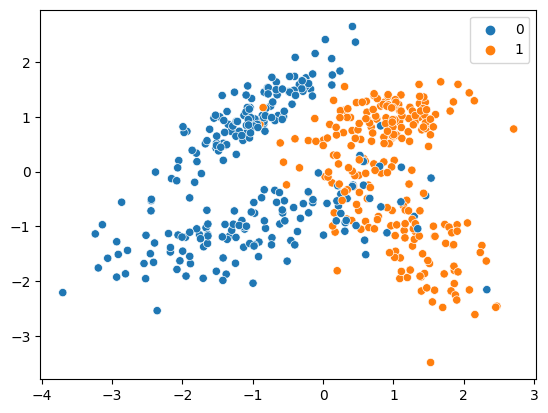

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

In [16]:
# First extract features x1 and x2 from x and reshape them to x1 vector arrays
x1 = x[:,1]
x2 = x[:,2]
x1 = x1.reshape(x1.shape[0], 1)
x2 = x2.reshape(x2.shape[0], 1)

print(x[:5,:], end="\n\n") # For visualization of the first 5 values
print(*x1[:5,:]) # For visualization of the first 5 values
print(*x2[:5,:]) # For visualization of the first 5 values

[[ 1.          2.25698215 -1.34710915]
 [ 1.          1.43699308  1.28420453]
 [ 1.          0.57927295  0.23690172]
 [ 1.          0.42538132 -0.24611145]
 [ 1.          1.13485101 -0.61162683]]

[2.25698215] [1.43699308] [0.57927295] [0.42538132] [1.13485101]
[-1.34710915] [1.28420453] [0.23690172] [-0.24611145] [-0.61162683]


--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [17]:
def new_features(x, degree=2):
    '''
    Function to create n-degree features from the input

    Input:
    x: the initial features
    degree: the maximum degree you wantthe features

    Output:
    features: the final features.
              2nd degree features must have the order [x, x1x1, x1x2, x2x2]
              2nd degree features must have the order [x, x1x1, x1x2, x2x2, x1x1x1, x1x1x2, x1x2x2, x2x2x2]
    '''

    features = np.ones(x[:,1].shape[0])
    x1 = x[:,1]
    x2 = x[:,2]
    features = np.stack([features, x1, x2, x1*x1, x1*x2, x2*x2, x1*x1*x1, x1*x1*x2, x1*x2*x2, x2*x2*x2], axis = 1)
    features = features[:, 0:(2**degree+2)]


    return features



**Do not write below this line just run it**

--------------------------------------------

In [18]:
x_new_quad = new_features(x, degree=2)
x_new_cubic = new_features(x, degree=3)

#reordering output features
temp = np.copy(x_new_quad[:, -1])
x_new_quad[:, -1] = x_new_quad[:, -2]
x_new_quad[:, -2] = temp

temp = np.copy(x_new_cubic[:, -1])
x_new_cubic[:, -1] = x_new_cubic[:, -2]
x_new_cubic[:, -2] = x_new_cubic[:, -3]
x_new_cubic[:, -3] = temp


Now use the gradient ascent optimization algorithm to learn theta by maximizing the log-likelihood, both for the case of x_new_quad and x_new_cubic.

In [19]:
# Initialize theta0, in case of quadratic features
theta0_quad = np.zeros(x_new_quad.shape[1])

theta_final_quad, log_l_history_quad = gradient_ascent(theta0_quad,x_new_quad,y,lr=0.5,num_steps=n_iter)

# Initialize theta0, in case of quadratic and cubic features
theta0_cubic = np.zeros(x_new_cubic.shape[1])

# Run Newton's method, in case of quadratic and cubic features
theta_final_cubic, log_l_history_cubic = gradient_ascent(theta0_cubic,x_new_cubic,y,lr=0.5,num_steps=n_iter)

# check and compare with previous results
print("theta_final_quad:", theta_final_quad, end="\n\n")
print("theta_final_cubic:", theta_final_cubic)

theta_final_quad: [ 0.07548038  3.32398303  0.27106753 -0.51873505 -0.34088582 -0.04846172]

theta_final_cubic: [ 0.82395453  2.41957969  1.66049077 -1.13927962 -0.20657699 -0.96074035
  0.34384121 -0.64078458  0.95132383  1.40927121]


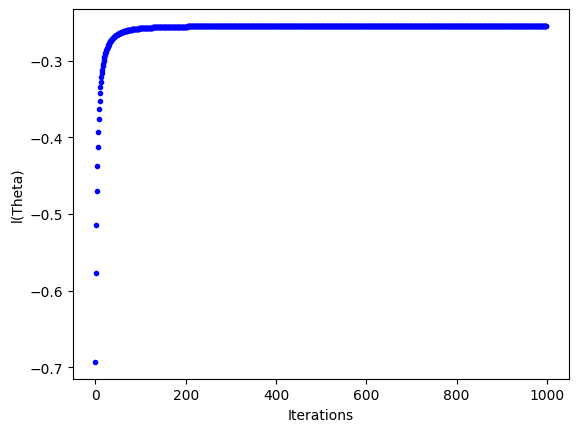

In [20]:
# Plot the log likelihood values in the optimization iterations, in one of the two cases.
fig,ax = plt.subplots(num=2)

ax.set_ylabel('l(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history_quad)),log_l_history_quad,'b.')

### **Question 2.2: Plot the computed non-linear boundary**



First, define a boundary_function to compute the boundary equation for the input feature vectors $x_1$ and $x_2$, according to estimated parameters theta, both in the case of quadratic (theta_final_quad) and of quadratic and cubic features (theta_final_cubic). Refer for the equation to the introductory part of Question 2.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [21]:
def boundary_function(x1_vec, x2_vec, theta_final):

    x1_vec, x2_vec = np.meshgrid(x1_vec,x2_vec)

    if len(theta_final) == 6:
        # boundary function value for features up to quadratic
        c_0, c_1, c_2, c_3, c_4, c_5 = theta_final
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec**2 + c_4*x2_vec**2 + c_5*x1_vec*x2_vec
    elif len(theta_final) == 10:
        # boundary function value for features up to cubic
        c_0, c_1, c_2, c_3, c_4, c_5, c_6, c_7, c_8, c_9 = theta_final
        f = c_0 + c_1*x1_vec + c_2*x2_vec + c_3*x1_vec**2 + c_4*x2_vec**2 + c_5*x1_vec*x2_vec + c_6*x1_vec**3 + c_7*x2_vec**3 +  c_8*x2_vec*x1_vec**2  + c_9*x1_vec*x1_vec**2
    else:
        raise("Number of Parameters is not correct")

    return x1_vec, x2_vec, f


**Do not write below this line just run it**

--------------------------------------------

Now plot the decision boundaries corresponding to the theta_final_quad and theta_final_cubic solutions.

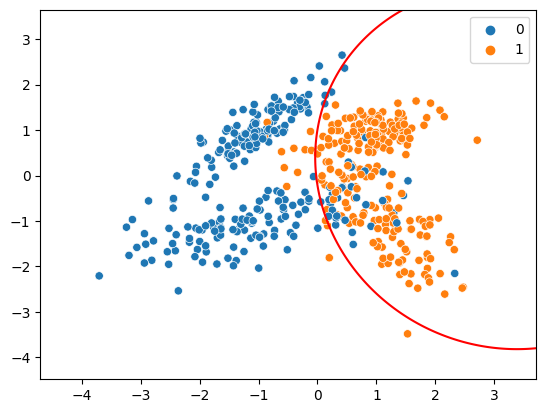

In [22]:
x1_vec = np.linspace(X[:,0].min()-1,X[:,0].max()+1,200);
x2_vec = np.linspace(X[:,1].min()-1,X[:,1].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_quad)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.show()

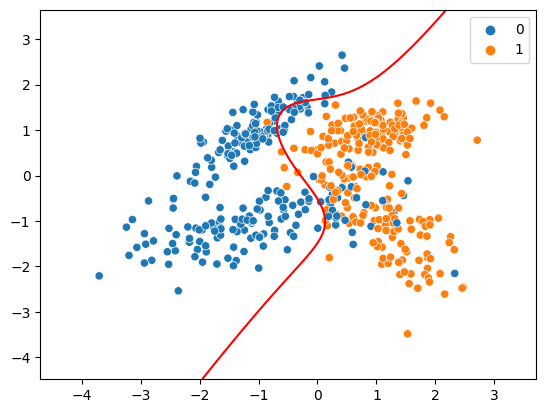

In [23]:
x1_vec = np.linspace(X[:,0].min()-1,X[:,0].max()+1,200);
x2_vec = np.linspace(X[:,1].min()-1,X[:,1].max()+1,200);

x1_vec, x2_vec, f = boundary_function(x1_vec, x2_vec, theta_final_cubic)

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, data=X);

plt.contour(x1_vec, x2_vec, f, colors="red", levels=[0])
plt.show()

**Confusion Matrix**

Here you can see the confusion matrices related to the three models you've implemented.


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

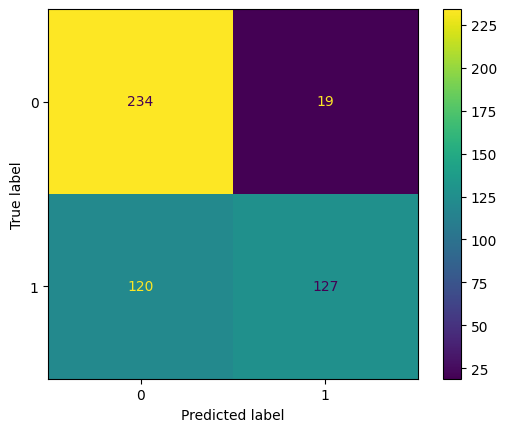

In [25]:
## logistic regression with linear buondary

z = np.dot(x,theta_final)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_hat))
disp.plot()
plt.show()

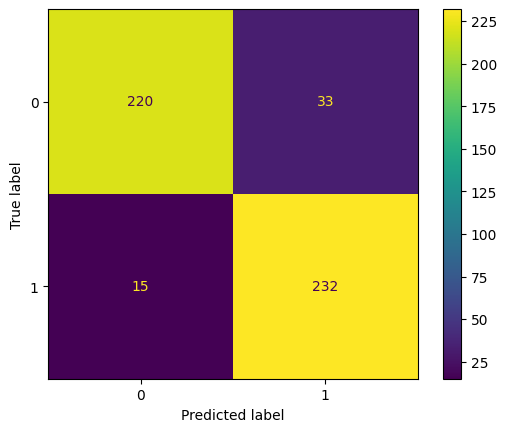

In [26]:
## logistic regression with non linear buondary - quadratic

z = np.dot(x_new_quad,theta_final_quad)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_hat))
disp.plot()
plt.show()

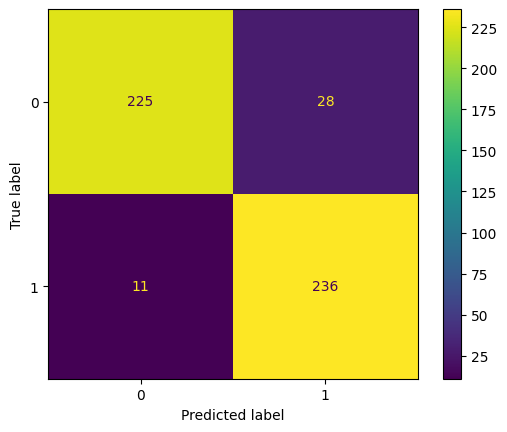

In [27]:
## logistic regression with non linear buondary - cubic

z = np.dot(x_new_cubic,theta_final_cubic)
probabilities = sigmoid(z)
y_hat = np.array(list(map(lambda x: 1 if x>0.5 else 0, probabilities)))
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_hat))
disp.plot()
plt.show()

### **Question 2.3: Report *(3/7 Points)***



Write now your considerations. Discuss in particular:
1. Look back at the plots you have generated. What can you say about the differences between the linear, quadratic, and cubic decision boundaries? Can you say if the model is improving in performances, increasing the degree of the polynomial? Do you think you can incur in underfitting increasing more and more the degree?
2. Let's now delve into some quantitative analysis. The three tables you have generated represent the confusion matrix for the model you have implemented in the first two questions. What can you say about actual performances? Does the increase of the degree have a high effect on the results?


-------------------------------------------------------


**WRITE YOUR ANSWER HERE:**

1. Looking at the plots, although in general the models are all efficient, it is evident that the quadratic and cubic boundaries appear more flexible and seem to separate the points more appropriately. It must be considered, however, that with higher polynomial degrees we increase the risk of overfitting.


2. In general, observing the confusion matrix in the different cases does not reveal any striking effects on performance as the degree of the polynomial increases. Specifically, however, we can observe that the rate of correctly detected positives increases as the degree of the polynomial increases, especially in the cubic case (225 for the cubic case, 220 for the quadratic one and 218 for the linear boundary), and there is a progressive decrease in false negatives already at the level of the quadratic boundary (22 for the linear boundary, 15 for the quadratic one and 11 for the cubic boundary), making the cubic model appear to be the one with the best performance.
To see how performance increases we can compute some metrics as for example:


\begin{align*}
Accuracy=\frac{TP+TN}{N}
\end{align*}


\begin{align*}
Precision=\frac{TP}{TP+FP}
\end{align*}

\begin{align*}
Recall=\frac{TP}{TP+FN}
\end{align*}



We obtain for the linear model:


$$Accuracy=\frac{226+215}{500}=0.882 \qquad Precision=\frac{226}{226+27}=0.893 \qquad Recall=\frac{226}{226+32}=0.876$$

For the quadratic:


$$Accuracy=\frac{220+232}{500}=0.904 \qquad Precision=\frac{220}{220+33}=0.870 \qquad Recall=\frac{220}{220+15}=0.936$$

For the cubic:


$$Accuracy=\frac{225+236}{500}=0.922 \qquad Precision=\frac{225}{225+28}=0.890 \qquad Recall=\frac{225}{225+11}=0.953$$


Therefore we observe only slightly changes in these metrics among the different models.

-----------------------------------------

## **Question 3: Multinomial Classification *(13 Points)***

### **Question 3.1: Softmax Regression Model *(4/13 Points)***

In the multinomial classification we generally have $K>2$ classes. So the label for the $i$-th sample $X_i$ is $y_i\in\{1,...,K\}$, where $i=1,...,N$. The output class for each sample is estimated by returning a score $s_i$ for each of the K classes. This results in a vector of scores of dimension K.
In this exercise we'll use the *Softmax Regression* model, which is the natural extension of *Logistic Regression* for the case of more than 2 classes. The score array is given by the linear model:

\begin{align*}
s_i =  X_i \theta
\end{align*}

Scores may be interpreted probabilistically, upon application of the function *softmax*. The position in the vector with the highest probability will be predicted as the output class. The probability of the class k for the $i$-th data sample is:

\begin{align*}
p_{ik} = \frac{\exp(X_i \theta_k)}{\sum_{j=1}^K(X_i \theta_j))}
\end{align*}

We will adopt the *Cross Entropy* loss and optimize the model via *Gradient Descent*.
In the first of this exercise we have to:
-    Write the equations of the Cross Entropy loss for the Softmax regression model;
-    Compute the equation for the gradient of the Cross Entropy loss for the model, in order to use it in the gradient descent algorithm.

#### A bit of notation

*  N: is the number of samples
*  K: is the number of classes
*  X: is the input dataset and it has shape (N, H) where H is the number of features
*  y: is the output array with the labels; it has shape (N, 1)
*  $\theta$: is the parameter matrix of the model; it has shape (H, K)

--------------------------------------------
**Write you equation below this line**

--------------------------------------------

Cross entropy loss:
\begin{align*}
L(\theta)=- \sum_{i=1}^N \sum_{j=1}^K\Bigg[ 1\{y_i=j\}log\Bigg(\frac{exp(\theta_j^{T}X_i)}{\sum_{j=1}^K exp(\theta_j^{T}X_i)}\Bigg)\Bigg]
\end{align*}



Gradient:


\begin{align*}
\nabla_{\theta_k} L(\theta) = \frac{\partial L(\Theta)}{\partial \Theta_k} =
 \frac{\partial}{\partial \Theta_k} \Bigg\{- \sum_{i=1}^N \sum_{j=1}^K\Bigg[ 1\{y_i=j\}log\Bigg(\frac{exp(\theta_j^{T}X_i)}{\sum_{j=1}^K exp(\theta_j^{T}X_i)}\Bigg)\Bigg]\Bigg\}
\end{align*}

First we compute the derivative of the softmax function:

\begin{align*}
\frac{\partial }{\partial \Theta_k}\Bigg(\frac{exp(\theta_j^{T}X_i)}{\sum_{j=1}^K exp(\theta_j^{T}X_i)}\Bigg)=p_{ij}[1(k=j)-p_{ik}]X_i
\end{align*}

where we have leveraged the chain rule and the fact properties of the indicator function $1(i = j) = 0$ if $i \ne j$ and $1(i = j) = 1$ if $i = j$.

Then

\begin{align*}
\frac{\partial}{\partial \Theta_k} \sum_{j=1}^K\Bigg( 1\{y_i=j\}log(p_{ij})\Bigg) =  1\{y_i=j\} \sum_{j=1}^K\Bigg( 1\{k=j\} - p_{ik} \Bigg)X_i = X_i \Bigg( 1\{y_i=k\} - p_{ik} \Bigg)
\end{align*}

again leveraging the properties of the indicator funciton and taking $X_i$ outside the summations, being independent from the summation index.
Finally, with the above computations, we obtain the gradient of the Cross Entropy Loss.


\begin{align*}
\nabla_{\theta_k} L(\theta)=-\sum_{i=1}^N X_i[1(y_i=k)-p_{ik}]
\end{align*}





**Do not write below this line just run it**

--------------------------------------------

### **Question 3.2: Coding *(4/13 Points)***

Now we will implement the code for the equations. Let's implement the functions:
-  softmax
-  CELoss
-  CELoss gradient
-  gradient descent

We generate a toy dataset with *sklearn* library. Do not change anything outside the parts provided of your own code (else the provided checkpoint will not work).

In [28]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=300, n_features=7, n_informative=7, n_redundant=0, n_classes=3, random_state=1)
X.shape, y.shape

((300, 7), (300,))

**Hint for the implementation:** consider the labels $y$ as one-hot vector. This will allow matrix operations (element-wise multiplication and summation).

In [29]:
import scipy
import numpy as np

def class2OneHot(vec):
    out_sparse = scipy.sparse.csr_matrix((np.ones(vec.shape[0]), (vec, np.array(range(vec.shape[0])))))
    out_onehot = np.array(out_sparse.todense()).T
    return out_onehot

y_onehot = class2OneHot(y)

Let's visualize the generated dataset. We use the *Principal Component Analysis* (PCA) as a visualization method.

PCA summarizes the high-dimensional feature vectors of each sample into two features, which we can illustrate with a 2D plot.

Look at the following plot. The three generated classes do not seem separable.

In [30]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns = ['target'])], axis = 1)

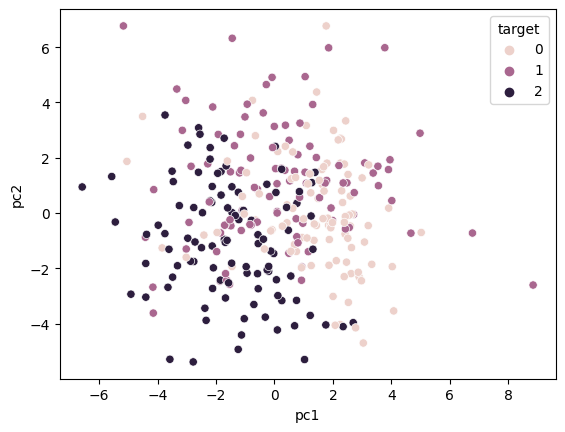

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='pc1', y='pc2', hue='target', data=finalDf);

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [32]:
from math import exp
def softmax(theta, X):
    '''
    Function to compute associated probability for each sample and each class.

    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)



    Output:
    softmax: it's the matrix containing probability for each sample and each class. The shape is (N, K)
    '''
    matrix = np.dot(X, theta)
    softmax = np.exp(matrix)
    softmax = np.divide(softmax.T, np.sum(softmax, axis = 1)).T



    return softmax


def CELoss(theta, X, y_onehot):
    '''
    Function to compute softmax regression model and Cross Entropy loss.

    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Output:
    loss: The scalar that is the mean error for each sample.
    '''
    p_est = softmax(theta, X)
    loss = - np.sum( y_onehot * np.log(p_est)) / y_onehot.shape[0]

    return loss

def CELoss_jacobian(theta, X, y_onehot):
    '''
    Function to compute gradient of the cross entropy loss with respect the parameters.

    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)

    Output:
    jacobian: A matrix with the partial derivatives of the loss. The shape is (H, K)
    '''

    s = softmax(theta, X)
    result = np.dot(X.T, s - y_onehot  ) / y_onehot.shape[0]
    return result


def gradient_descent(theta, X, y_onehot, alpha=0.01, iterations=100):
    '''
    Function to compute gradient of the cross entropy loss with respect the parameters.

    Input:
    theta: it's the model parameter matrix. The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y_onehot: it's the label array in encoded as one hot vector. The shape is (N, K)
    alpha: it's the learning rate, so it determines the speed of each step of the GD algorithm
    iterations: it's the total number of step the algorithm performs

    Output:
    theta: it's the updated matrix of the parameters after all the iterations of the optimization algorithm. The shape is (H, K)
    loss_history: it's an array with the computed loss after each iteration
    '''

    # We initialize an empty array to be filled with loss value after each iteration
    loss_history = np.zeros(iterations)

    # With a for loop we compute the steps of GD algo
    for it in range(iterations):

        loss = CELoss(theta, X, y_onehot)
        gradient = CELoss_jacobian(theta, X, y_onehot)

        theta = theta - alpha*gradient

        loss_history[it] = loss


        pass

    return theta, loss_history



**Do not write below this line just run it**

--------------------------------------------

In [33]:
# Initialize a theta matrix with random parameters
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))

print("Initial Loss with initialized theta is:", CELoss(theta0, X, y_onehot))

# Run Gradient Descent method
n_iter = 1000
theta_final, log_l_history = gradient_descent(theta0, X, y_onehot, alpha=0.01, iterations=n_iter)


Initial Loss with initialized theta is: 1.5711488140463705


In [34]:
theta_final

array([[ 0.67234101,  0.74970372,  0.75210089],
       [ 0.34664489,  0.21058016,  0.31174955],
       [ 0.25841145,  0.27461226,  0.90682071],
       [ 0.30649652,  0.00483208,  1.06511046],
       [ 0.78078016,  0.2647026 ,  0.30321344],
       [ 0.67073979,  0.67217923,  0.47368831],
       [ 0.52499021, -0.51283839,  0.7277598 ]])

In [35]:
loss = CELoss(theta_final, X, y_onehot)
print("Loss:", loss)

Loss: 0.5864884580339456


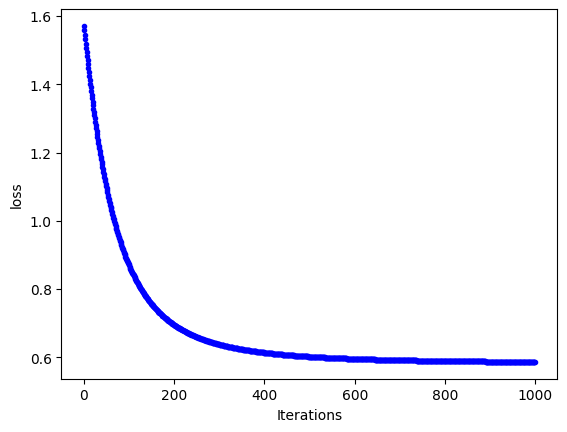

In [36]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('loss')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)), log_l_history,'b.')

### **Question 3.3: Meseaure of Godness *(2/13 Points)***

Let's now evaluate the goodness of the learnt based on accuracy:

\begin{equation}
Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}
\end{equation}

Implement the compute_accuracy function. You may compare the accuracy achieved with learnt model Vs. a random model (random $\Theta$) or one based on $\Theta$'s filled with zeros.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [37]:
def compute_accuracy(theta, X, y):
    '''
    Function to compute accuracy metrics of the softmax regression model.

    Input:
    theta: it's the final parameter matrix. The one we learned after all the iterations of the GD algm.
            The shape is (H, K)
    X: it's the input data matrix. The shape is (N, H)
    y: it's the label array. The shape is (N, 1)

    Output:
    accuracy: Score of the accuracy.
    '''
    predicted_labels = np.zeros((y.shape[0], theta.shape[1]))   # matrix of zeros of dimention (N,K)


    probs = softmax(theta, X)  # matrix containing probability for each sample and each class. The shape is (N, K)
    for i in range(X.shape[0]):
        predicted_labels[i][np.argmax(probs[i])]= 1   #assigning labels based on predictions

    y_onehot = class2OneHot(y)

    diff = np.subtract(predicted_labels, y_onehot)   #goal: compute number of rows of matrix "diff" containing only zeros.
                                                    #these rows correspond to a correct prediction.


    diff_1D = np.sum(np.abs(diff), axis = 1)       #summing the absolute value of "diff" over rows

    accuracy = float(np.count_nonzero(diff_1D==0))/diff_1D.size    #counting number of zeros over total number of elements

    return accuracy

--------------------------------------------
**Do not write below this line just run it**

--------------------------------------------

In [38]:
compute_accuracy(theta_final, X, y)

0.7966666666666666

In [39]:
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))
compute_accuracy(theta0, X, y)

0.43333333333333335

In [40]:
compute_accuracy(np.zeros((X.shape[1], len(np.unique(y)))), X, y)

0.3333333333333333

### **Question 3.4: Report *(3 Points)***

Experiment with different values for the learning rate $\alpha$ and the number of iterations.

Look how the loss plot changes the convergence rate and accuracy metric.

Report also execution time of each run. For this last step, you could you **time** at the beginning of the cell to display the time needed for the algorithm.

In [41]:
# Initialize a theta matrix with random parameters
theta0 = np.random.rand(X.shape[1], len(np.unique(y)))


In [42]:
%%time

print("Initial Loss with initialized theta is:", CELoss(theta0, X, y_onehot))

# Run Gradient Descent method
n_iter = 100
theta_final, log_l_history = gradient_descent(theta0, X, y_onehot, alpha=0.5, iterations=n_iter)

print('accuracy : ', compute_accuracy(theta_final, X, y))

Initial Loss with initialized theta is: 1.511636384715391
accuracy :  0.7866666666666666
CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 21.3 ms


--------------------------------------------
**Write your report below this line**

--------------------------------------------

| LR | Iter | Accuracy | Time |
|---|---|---|---|
|  |  |  |  |
| 0.001 | 100 | 0.43  | 16.6 ms |
| 0.003 | 100 | 0.49  | 20.2 ms |
| 0.01 | 100 | 0.69 | 27.5 ms |
| 0.03 | 100 | 0.77  | 14.8 ms |
| 0.1 | 100 | 0.79 | 22.5 ms |
| 0.3 | 100 | 0.79 | 17.6 ms |
| 1 | 100 | 0.786 | 15.7 ms |
| 3| 100 | 0.68 | 19.2 ms |
| 10 | 100 | 0.66 | 18.9 ms |
| 0.001 | 1000 | 0.69  | 193 ms |
| 0.003 | 1000 | 0.77  | 184 ms |
| 0.01 | 1000 | 0.79  | 219 ms |
| 0.03 | 1000 | 0.79  | 184 ms |
| 0.1 | 1000 | 0.786 | 226 ms |
| 0.3 | 1000 | 0.786 | 171 ms |
| 1 | 1000 | 0.786 | 191 ms |
| 3| 1000 | 0.683 | 210 ms |
| 10 | 1000 | 0.66 | 152 ms |

We can observe, as in the case of bivariate classification, that the importance of the learning rate is decisive for having optimal accuracy. Similarly to the previous case we observe that if $\alpha$ is too small convergence requires a high number of iterations, and if it is to large we may not observe convergence and therefore arrive at optimal accuracy.
In fact, theoreticaly the number of iterations is not defined a priori, but rather defined by the finding of a convergence. We observe that 100 iterations are enough, with an adequate learning rate $0.1 \le lr \le 0.3$ to obtain an optimal accuracy.


NB: please note that the above cell has been executed, prior to submission, on a different machine, not on the one used to write the report. Also this report and the Question 4 report have been obtained on two different machines.

## **Question 4 (BONUS): Trasfer Learning on CIFAR-10 _(5 points)_**

**Transfer Learning (TL)** is a machine learning technique that consists in reusing a pre-trained model and its weights to perform a task similar to the one the model has been trained on. Pre-trained models are usually trained using large amounts of data and are really useful if you have just a small dataset to learn from.

In this bonus question you are going to leverage a pre-trained DNN, [**AlexNet**](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf), trained on the IMAGENET dataset, in order to train two classification models on a different, smaller, dataset (CIFAR-10 in this case).

The dataset your are going to use is made of 50000 feature embeddings with 1024 dimensions obtained by encoding the images in CIFAR-10 with the pre-trained AlexNet. This means that your classifier is going to leverage the representation power of a relatively large DNN without the actual need to train in from scratch, which would require high GPU power and many hours/days of training.

For the most curious among you: at the end of the exercise you will find the actual code that we used to encode the CIFAR-10 dataset with AlexNet using the [**PyTorch**](https://pytorch.org/) framework. In case you wanted to run it, we suggest to either use Google Colab with the runtime set to GPU (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relative capable GPU (minimum 4GB of VRAM).

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

### **Code used to create the dataset _(no points)_**

This part of the homework will not give you any points and it is not needed to complete the assignment, so please don't ask for help before the deadline if you are not able to run it.

Run only if you have the following minimum requirements:
- Google Colab with GPU runtime active (Runtime -> Change runtime type -> GPU) or a PC/laptop with a relatively capable GPU (minimum 4GB of VRAM)
- High speed connection and minimum 4GB of free storage
    - the download of the dataset and the weights of the pre-trained AlexNet have large sizes!

In [43]:
# import useful libraries and functions
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np

from sklearn.preprocessing import normalize
from tqdm import tqdm

torch.manual_seed(123)
np.random.seed(123)

In [44]:
# image transform for CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# download CIFAR-10 dataset for train and test
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# download pre-trained AlexNet
pretrained_net = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', weights='AlexNet_Weights.DEFAULT')
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# define the device you will use for training (cpu or cuda)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

100%|██████████| 170498071/170498071 [00:13<00:00, 12553554.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 207MB/s]


Let's take a look at it!

The network is composed by a backbone with multiple Conv2d, ReLU and MaxPool2d layers, by an average pooling layer, and by a classifier.

We are going to use just the backbone of the pre-trained AlexNet (the layers included into *(features)*) and we will define a new classifier. We will train everything together on the CIFAR-10 dataset and we will leverage the pre-trained weights of the backbone to obtain high classification accuracy with just a few epochs of training. This is the power of Transfer Learning!

In [45]:
pretrained_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [46]:
# create train and test dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_data, batch_size=256, shuffle=True, num_workers=2)

In [47]:
# define the encoder network to obtain image embeddings
encoder = pretrained_net.features.to(device).eval()
encoder[12] = nn.MaxPool2d(kernel_size=9, stride=4)
encoder

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
)

In [48]:
def create_dataset(loader, feat_size, num_classes):
    X = np.empty((0, feat_size))
    y_onehot = np.empty((0, num_classes))

    for i, data in tqdm(enumerate(loader), total=len(loader)):
        images, labels = data[0].to(device), data[1].to(device)
        emb = encoder(images)
        emb = torch.flatten(emb, 1).detach().cpu().numpy()
        X = np.concatenate((X, emb))
        y_temp = nn.functional.one_hot(labels, 10).detach().cpu().numpy()
        y_onehot = np.concatenate((y_onehot, y_temp))

    X = normalize(X, axis=1, norm='l1')
    y = np.argmax(y_onehot, axis=1)
    return X, y, y_onehot

In [49]:
print("Preparing train data...")
X_train, y_train, y_onehot_train = create_dataset(trainloader, 1024, 10)
print("Preparing test data...")
X_test, y_test, _ = create_dataset(testloader, 1024, 10)

Preparing train data...


100%|██████████| 196/196 [01:58<00:00,  1.66it/s]


Preparing test data...


100%|██████████| 40/40 [00:18<00:00,  2.19it/s]


In [50]:
import os
if not os.path.exists("./processed_data"):
  os.makedirs("./processed_data")

In [51]:
np.save('./processed_data/X_train.npy', X_train)
np.save('./processed_data/y_train.npy', y_train)
np.save('./processed_data/y_onehot_train.npy', y_onehot_train)

np.save('./processed_data/X_test.npy', X_test)
np.save('./processed_data/y_test.npy', y_test)

--------------------------------------------

In [52]:
# import libraries and set seed
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

np.random.seed(123)

In [53]:
# load the train and test datasets
X_train = np.load('./processed_data/X_train.npy')
y_train = np.load('./processed_data/y_train.npy')
y_onehot_train = np.load('./processed_data/y_onehot_train.npy')

X_test = np.load('./processed_data/X_test.npy')
y_test = np.load('./processed_data/y_test.npy')

In [54]:
# Shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("y_onehot_train shape:", y_onehot_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (50000, 1024)
y_train shape: (50000,)
y_onehot_train shape: (50000, 10)
X_test shape: (10000, 1024)
y_test shape: (10000,)


### **Question 4.1: Train a KNN Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a KNN Classification model using the pre-processed and encoded CIFAR-10 dataset (given by us).

The encoded dataset is made of 50000 feature embeddings with 1024 dimensions. The labels are encoded as integers in the range [0,9], they will serve as the target of your classifier.

KNN is a simple and intuitive classification algorithm that works by assigning a label to a new sample based on the labels of the K nearest samples in the training set. The label is the one that appears the most among the K nearest samples.


**HINTS:**
* You will have to train the KNN classifier on the training set by trying different values of K. At the end you will have to report the accuracy of your model on the test set for the best value of K.
* You **must** use sklearn.neighbors.KNeighborsClassifier to train your model. You can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).



In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [56]:
# subsampling data
num_training = 10000
mask = list(range(num_training))
X_train_sub = X_train[mask]
y_train_sub = y_train[mask]

In [57]:
k_range = range(5, 11)
scores = {}
scores_list = []

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [58]:
for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train_sub, y_train_sub)
    y_pred = classifier.predict(X_test)
    scores_list.append(metrics.accuracy_score(y_pred, y_test))

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

Text(0, 0.5, 'Testing Accuracy')

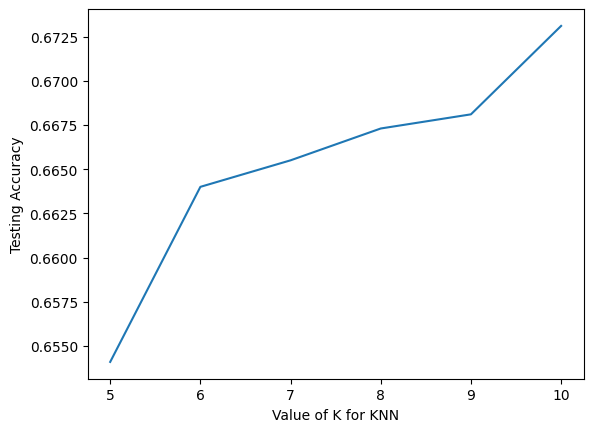

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

In [60]:
%%time
# now pick the best k and train on the whole training set

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

CPU times: user 55.3 s, sys: 90.5 ms, total: 55.4 s
Wall time: 31.4 s


In [61]:
# print the accuracy
print(metrics.accuracy_score(y_test, y_pred))

0.7363


In [62]:
# print the accuracy
y_pred = knn.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))

0.79738


### **Question 4.2: Train a Softmax Classifier on CIFAR-10 _(2/5 points)_**

Your goal is to train a Softmax Regression Model using the pre-processed and encoded CIFAR-10 dataset (given by us) and the code written by you in Question 3.2.

Here you have to write the code to train your Softmax Regression Model.  
Your function has to return the inital theta, the learned theta, and the loss history.  
You can evaluate its performance with the code below.

**HINT:** Experiment with different alpha's with a small number of iterations to keep the training time low. Once you find the best alpha you can train your model for as long as needed.

--------------------------------------------
**Write your code below this line**

--------------------------------------------

In [63]:
def fit_softmax_classifier(X_train, y_onehot_train, alpha, n_iter):

    theta0 = np.random.rand(X_train.shape[1], y_onehot_train.shape[1])
    print("Initial Loss with initialized theta is:", CELoss(theta0, X_train, y_onehot_train))
    theta_final, log_l_history = gradient_descent(theta0, X_train, y_onehot_train, alpha = alpha, iterations = n_iter)
    print("Final Loss with learned theta is:", CELoss(theta_final, X_train, y_onehot_train))

    return theta0, theta_final, log_l_history

--------------------------------------------
**Do not write below this line, just run it**

--------------------------------------------

In [64]:
%%time
theta0, theta_final, log_l_history = fit_softmax_classifier(X_train, y_onehot_train, alpha=1e4, n_iter=1000)

Initial Loss with initialized theta is: 2.3029951106016764
Final Loss with learned theta is: 0.6472502219584162
CPU times: user 15min 32s, sys: 52.5 s, total: 16min 24s
Wall time: 9min 16s


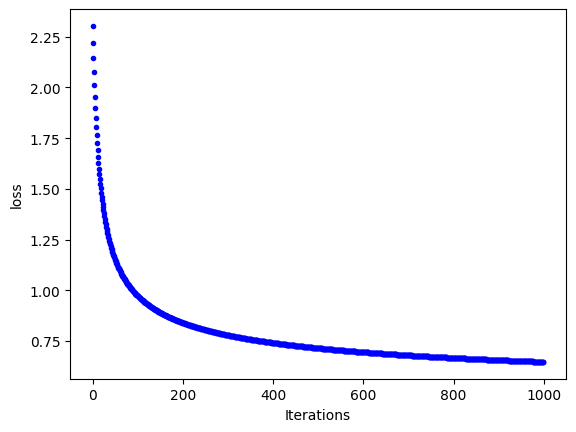

In [65]:
fig,ax = plt.subplots(num=2)

ax.set_ylabel('loss')
ax.set_xlabel('Iterations')
_=ax.plot(range(len(log_l_history)), log_l_history,'b.')

In [66]:
theta0 = np.random.rand(X_train.shape[1], 10)

acc_rand_train = compute_accuracy(theta0, X_train, y_train)
acc_train = compute_accuracy(theta_final, X_train, y_train)

acc_rand_test = compute_accuracy(theta0, X_test, y_test)
acc_test = compute_accuracy(theta_final, X_test, y_test)

print(f"Accuracy with random parameters on train set: {acc_rand_train}")
print(f"Accuracy with learned parameters on train set: {acc_train}")
print(f"Accuracy with random parameters on test set: {acc_rand_test}")
print(f"Accuracy with learned parameters on test set: {acc_test}")

Accuracy with random parameters on train set: 0.09892
Accuracy with learned parameters on train set: 0.78384
Accuracy with random parameters on test set: 0.0969
Accuracy with learned parameters on test set: 0.7631


### **Question 4.3: Report _(1/5 points)_**

Write a report comparing the results obtained with the two different classifiers.

Try to answer the following questions:
- Which classifier performs better? Why? Is there a trade-off between the two in terms of perfomance/computation time?
- Do the classifiers obtain the same accuracy on train and test sets? If not, try to give an explanation.
- What values of alpha are best to train the two classifiers and what is the optimal number of iterations?

--------------------------------------------
**Write your report below this line**

--------------------------------------------

We found that the Softmax Classifier performs slightly better with an accuracy on the test set of 0.763, while the KNN Classifier reaches an accuracy of approximately 0.736 on the test set. These accuracies are similar to the ones computed on the training set. The KNN Classifier has an accuracy of 0.797 on the training set while the same value for the Softmax Classifier is 0.784, slightly higher. The two classifiers do not obtain the same accuracy on train and test sets and this probably happens due to the presence of differences between the provided test data and the ones used to train the classifier. However the differences are minimal.

The computation time is drastically higher for the Softmax Classifier, in fact we found that training the KNN Classifier took only 14.5 s, while training the Softmax Classifier took 2min 29s. So even if the Softmax Classifier performed slightly better, the high computation time required makes the KNN Classifier preferable when a small decrease in the accuracy is not an issue.

For the Softmax Classifer the best value of $\alpha$ is $10^4$. For $\alpha > 10^4$ the log likelihood diverges or behaves abnormally. With this learning rate we used 1000 steps, the smallest number of steps that allowed us to see convergence of the likelihood.  

